In [1]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-09 14:05:22--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.200.208, 52.217.136.128, 52.216.217.216, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.200.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  19.8MB/s    in 32s     

2023-10-09 14:05:55 (17.1 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [2]:
import numpy as np
import random
import os
import matplotlib

In [3]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [4]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [5]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [6]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

In [8]:
output = layers.Dense(1,activation='sigmoid')(x)

In [9]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [10]:
from tensorflow.keras.optimizers import RMSprop
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.0001),metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [12]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"


response = requests.get(url)

with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)

with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [13]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [14]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)

Epoch 1/30


<ipython-input-14-dc5fdd7b0e58>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)


100/100 - 62s - loss: 0.6970 - acc: 0.5250 - val_loss: 0.7122 - val_acc: 0.4940 - 62s/epoch - 624ms/step
Epoch 2/30
100/100 - 59s - loss: 0.6662 - acc: 0.6055 - val_loss: 0.6480 - val_acc: 0.6200 - 59s/epoch - 593ms/step
Epoch 3/30
100/100 - 58s - loss: 0.6515 - acc: 0.6210 - val_loss: 0.6400 - val_acc: 0.6290 - 58s/epoch - 584ms/step
Epoch 4/30
100/100 - 64s - loss: 0.6349 - acc: 0.6420 - val_loss: 0.6855 - val_acc: 0.5470 - 64s/epoch - 635ms/step
Epoch 5/30
100/100 - 64s - loss: 0.6172 - acc: 0.6555 - val_loss: 0.6002 - val_acc: 0.6830 - 64s/epoch - 637ms/step
Epoch 6/30
100/100 - 60s - loss: 0.6015 - acc: 0.6665 - val_loss: 0.6030 - val_acc: 0.6720 - 60s/epoch - 598ms/step
Epoch 7/30
100/100 - 68s - loss: 0.5685 - acc: 0.7140 - val_loss: 0.5783 - val_acc: 0.7030 - 68s/epoch - 676ms/step
Epoch 8/30
100/100 - 62s - loss: 0.5607 - acc: 0.7055 - val_loss: 0.5596 - val_acc: 0.7110 - 62s/epoch - 622ms/step
Epoch 9/30
100/100 - 65s - loss: 0.5599 - acc: 0.7195 - val_loss: 0.5480 - val_acc:

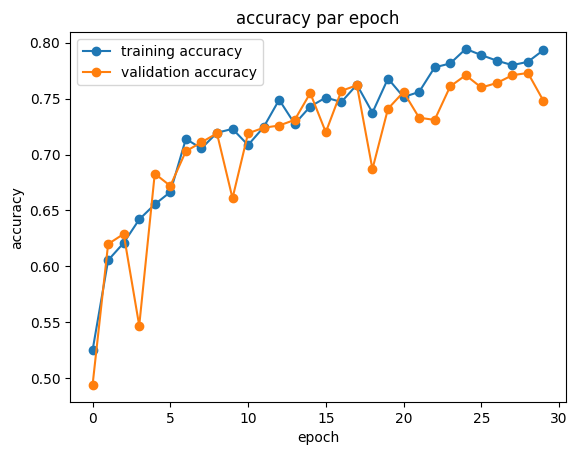

In [15]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


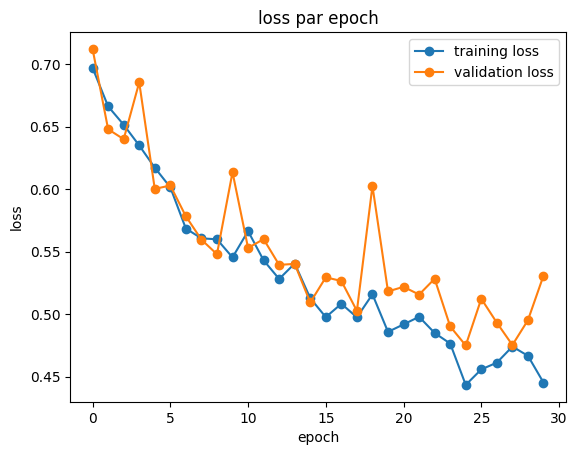

In [16]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [17]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 20s 157ms/step
Nombre de chats : [1541]Nombre de chiens : [959]


In [18]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 18s 143ms/step
Nombre de chats : [2054]Nombre de chiens : [446]


125/125 [==============================] - 20s 157ms/step


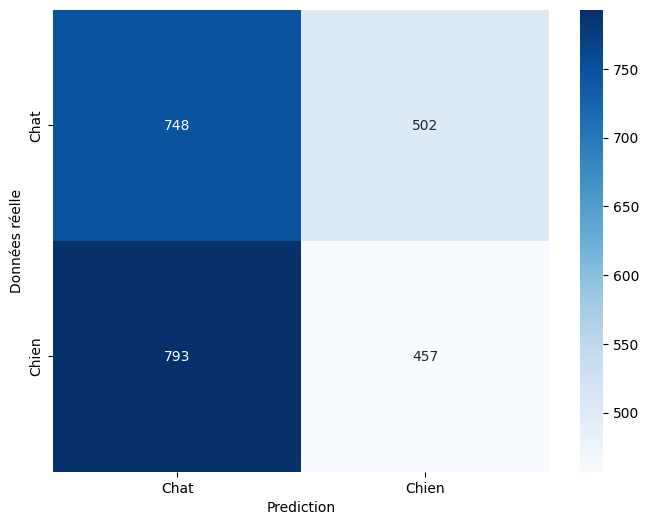

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = my_model.predict(validation_dataset)

binary_predictions = (predictions > 0.5).astype(int)

true_labels = validation_dataset.classes


cm = confusion_matrix(true_labels, binary_predictions)

class_names = ['Chat', 'Chien']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Données réelle')
plt.show()
